<a href="https://colab.research.google.com/github/vandien201462C/BT_GiuaKy/blob/main/Face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# Nhận diện khuôn mặt bạn trong lớp
# PHAM VAN DIEN - 20146485

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from numpy import asarray,save
from sklearn.model_selection import train_test_split
from time import time
from keras.utils import load_img, img_to_array
from keras.utils  import to_categorical
from keras.models import Sequential, Model
from keras.layers import *
from keras.layers import LeakyReLU
from keras.optimizers import Adam
from keras.engine.training import optimizers
from keras.backend import categorical_crossentropy

In [3]:
folder = '/content/drive/MyDrive/AI/face/Face/'

img_size = 100;
photos, labels = list(), list()
for file in listdir(folder) :
  output = 0.0
  if file.startswith('Dien'):
    output = 1.0
  if file.startswith('Hoi'):
    output = 2.0
  if file.startswith('Trung'):
    output = 3.0
  if file.startswith('quyen'):
    output = 4.0
  if file.startswith('Toan'):
    output = 5.0
  if file.startswith('Luan'):
    output = 6.0
  
  photo = load_img(folder + file, target_size = (img_size,img_size))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)
photos = asarray(photos)
labels = np.array(labels)
print(photos.shape, labels.shape)

     

(368, 100, 100, 3) (368,)


In [4]:
photos = photos.astype('float32')/255.0
print(photos.shape)
     

(368, 100, 100, 3)


In [5]:
(trainX, testX, trainY, testY) = train_test_split(photos, labels, test_size=0.20, stratify=labels, random_state=10)
(trainX, valX, trainY, valY) = train_test_split(trainX, trainY, test_size=0.25, random_state=10)
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)
print(valX.shape)
print(valY.shape)


(220, 100, 100, 3)
(220,)
(74, 100, 100, 3)
(74,)
(74, 100, 100, 3)
(74,)


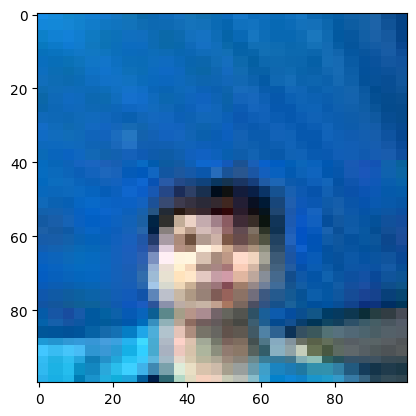

Hinh này là:  2.0


In [7]:

image_test=43
hinh = trainX[image_test]
plt.imshow(hinh) 
plt.show()  
print('Hinh này là: ', trainY[image_test])

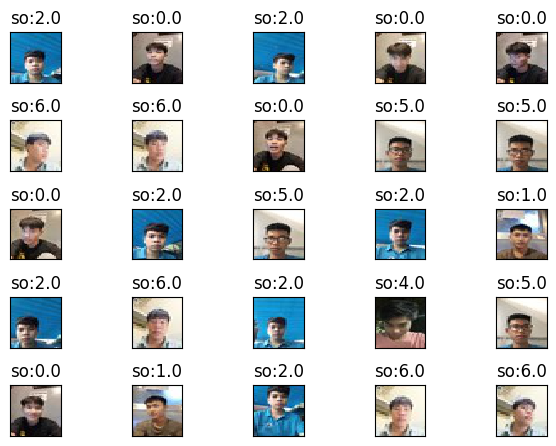

In [8]:

for i in range(25):  # 25 hình ảnh
  plt.subplot(5,5,i+1) # 5 cột , 5 hàng
  plt.tight_layout()
  plt.imshow(trainX[i], interpolation='none')
  plt.title('so:{}'.format(trainY[i]))
  plt.xticks([])
  plt.yticks([])

In [9]:

 #one hot enccoding giatri mau tung diem anh tu thap phan duoi dang 10 bit
trainY = to_categorical (trainY)
testY=to_categorical(testY)
valY=to_categorical(valY)

print(trainY.shape)
print(testY.shape)
print(valY.shape)

(220, 7)
(74, 7)
(74, 7)


In [10]:
batch_size=32
epochs=50
classes = 7

#Tạo 1 mạng có 28x28 input và 10 output
model = Sequential()

# 1 bộ VGG
model.add(Conv2D(32, kernel_size=(3,3), activation = 'linear', input_shape=(img_size,img_size,3),padding = 'same'))
model.add(LeakyReLU(alpha=0.1))  # Hàm xử lý dữ liệu (Ngưỡng)
model.add(MaxPooling2D((2,2), padding='same'))


# Bộ 2 VGG
model.add(Conv2D(64,(3,3) , activation = 'linear' , padding = 'same'))
model.add(LeakyReLU(alpha = 0.1)) # Hàm xử lý dữ liệu (Ngưỡng)
model.add(MaxPooling2D((2,2), padding = 'same'))


# Bộ 3 VGG
model.add(Conv2D(128,(3,3) , activation = 'linear' , padding = 'same'))
model.add(LeakyReLU(alpha = 0.1)) # Hàm xử lý dữ liệu (Ngưỡng)
model.add(MaxPooling2D((2,2), padding = 'same'))

# Bộ 4 VGG
model.add(Conv2D(256,(3,3) , activation = 'linear' , padding = 'same'))
model.add(LeakyReLU(alpha = 0.1)) # Hàm xử lý dữ liệu (Ngưỡng)
model.add(MaxPooling2D((2,2), padding = 'same'))

# ANN Model
model.add(Flatten()) # Lấy kích thước trước rồi làm phẳng
model.add(Dense(512, activation = 'linear'))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(classes, activation = 'softmax'))     

model.compile(loss = categorical_crossentropy, optimizer = Adam() , metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 100, 100, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 50, 50, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                    

In [12]:

start = time()
train = model.fit(trainX, trainY, batch_size,epochs=epochs,verbose = 1, validation_data=(valX, valY))
print(time()-start)
     

Epoch 1/50
7/7 [==============================] - 11s 2s/step - loss: 1.6925 - accuracy: 0.3227 - val_loss: 1.0225 - val_accuracy: 0.7432
Epoch 2/50
7/7 [==============================] - 8s 1s/step - loss: 0.6737 - accuracy: 0.8091 - val_loss: 0.1966 - val_accuracy: 1.0000
Epoch 3/50
7/7 [==============================] - 10s 2s/step - loss: 0.1491 - accuracy: 0.9682 - val_loss: 0.1078 - val_accuracy: 0.9595
Epoch 4/50
7/7 [==============================] - 9s 1s/step - loss: 0.4176 - accuracy: 0.9409 - val_loss: 0.2093 - val_accuracy: 0.9595
Epoch 5/50
7/7 [==============================] - 9s 1s/step - loss: 0.0784 - accuracy: 0.9864 - val_loss: 0.0881 - val_accuracy: 1.0000
Epoch 6/50
7/7 [==============================] - 10s 2s/step - loss: 0.0587 - accuracy: 0.9909 - val_loss: 0.0338 - val_accuracy: 0.9865
Epoch 7/50
7/7 [==============================] - 9s 1s/step - loss: 0.0145 - accuracy: 0.9955 - val_loss: 0.0106 - val_accuracy: 1.0000
Epoch 8/50
7/7 [======================

In [13]:
model.save('/content/drive/MyDrive/AI/fACE MODEL.H5')

Text(0.5, 0, 'Epoch')

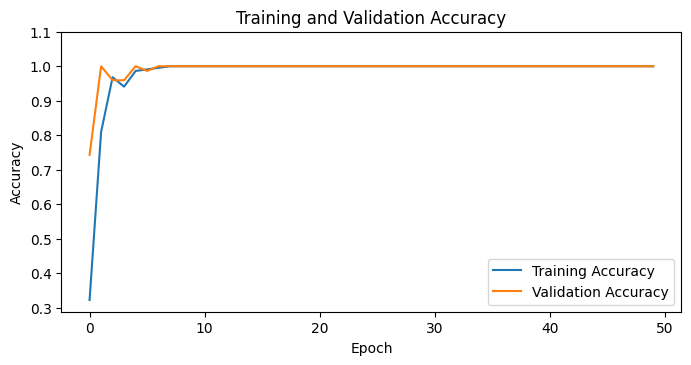

In [14]:
acc=train.history['accuracy']
val_acc=train.history['val_accuracy']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')

plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1.1])
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
     

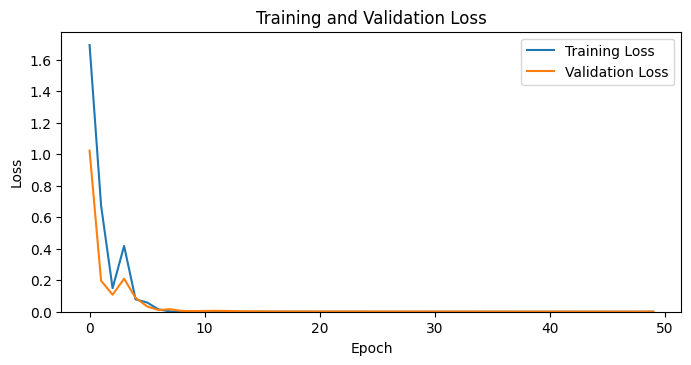

In [23]:
acc=train.history['accuracy']
val_acc=train.history['val_accuracy']
loss=train.history['loss']
val_loss=train.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Loss')
plt.ylim(0)
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.show()

1/1 [==============================] - 0s 40ms/step
Predicted:  Dien


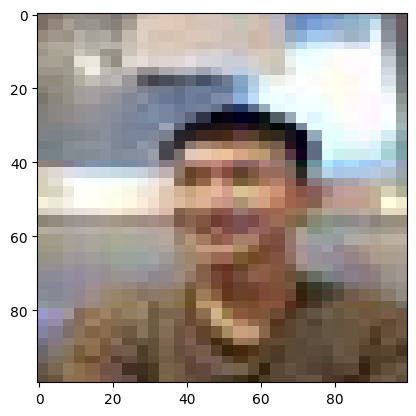

In [29]:
name= {1:'Dien', 2:'Hoi',3:'Trung',4:'quyen',5:'Toan',6:'Luan'}  
#test
filePath = '/content/drive/MyDrive/AI/face/Face (1)/Dien (11).jpg'
testImage = load_img(filePath, target_size=(img_size,img_size))
arrayImage = img_to_array(testImage).reshape(1,img_size,img_size,3)/255
pred = np.argmax(model.predict(arrayImage))
print("Predicted: ", name[pred])
plt.imshow(testImage)
     
     

1/1 [==============================] - 0s 57ms/step
Predicted:  Toan


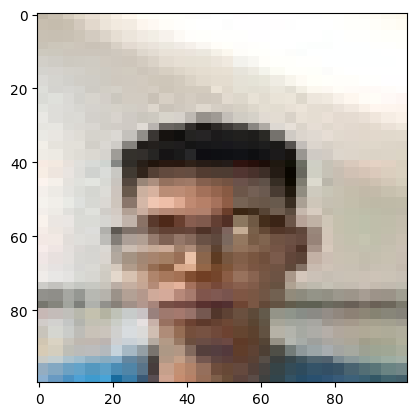

In [31]:
name= {1:'Dien', 2:'Hoi',3:'Trung',4:'quyen',5:'Toan',6:'Luan'}  
#test
filePath = '/content/drive/MyDrive/AI/face/Face (1)/Toan (8).jpg'
testImage = load_img(filePath, target_size=(img_size,img_size))
arrayImage = img_to_array(testImage).reshape(1,img_size,img_size,3)/255
pred = np.argmax(model.predict(arrayImage))
print("Predicted: ", name[pred])
plt.imshow(testImage)
     

In [32]:
# Tạo một mảng các chỉ số ngẫu nhiên
random_indices = np.random.choice(len(testX), size=72, replace=False)

# Lấy ra 30 mẫu ngẫu nhiên từ tập dữ liệu testX và testY
random_testX = testX[random_indices]
random_testY = testY[random_indices]

# Dùng mô hình để dự đoán nhãn của các mẫu trong tập dữ liệu ngẫu nhiên
results = model.predict(random_testX)
predicted_labels = np.argmax(results, axis=1)

from sklearn.metrics import accuracy_score
# tính độ chính xác 
accuracy = accuracy_score(np.argmax(random_testY, axis=1), predicted_labels)
print("Accuracy:", accuracy*100,"%")

3/3 [==============================] - 1s 197ms/step
Accuracy: 100.0 %
